First we need to read in some packages that we will need later. With the help of these packages we can e.g. read the data and create graphs.

# Higgs boson: data analysis  





In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

print('imported all modules')

imported all modules


Then we define some functions of our own.

In [ ]:
### Read out leptons from csv
def ReadLeptons(data, event):
  lepton1 = np.array([ data.values[event][0], data.values[event][1], data.values[event][2], data.values[event][3] ])
  lepton2 = np.array([ data.values[event][4], data.values[event][5], data.values[event][6], data.values[event][7] ])
  lepton3 = np.array([ data.values[event][8], data.values[event][9], data.values[event][10], data.values[event][11] ])
  lepton4 = np.array([ data.values[event][12], data.values[event][13], data.values[event][14], data.values[event][15] ])
  return [ lepton1, lepton2, lepton3, lepton4 ]

### Read out event weight from csv 
def ReadWeight(data, event):
  return data.values[event][16]

### Calculate energy of particles
def Energy(p):
  return p[3]

### calculate the pT of particles 
def Pt(p):
  pt = math.sqrt( p[0]*p[0] + p[1]*p[1] )
  return pt

### Mcalculate the mass of particles
def Mass(p):
  mass = 0
  m2 =   -p[0]*p[0] - p[1]*p[1] - p[2]*p[2] + p[3]*p[3]
  if m2 > 0:
    mass = math.sqrt( m2 )
  if m2 < 0:
    mass = 0
  
  return mass

### function to draw graphs
def plot(nbins, min, max, datavalues, mcvalues, mcweights, mcnames, xlabel, density = False, stacked = True):
  fig = plt.figure()
  fig.subplots_adjust()
  ax1 = fig.add_subplot()
  if density:
    ylabel = 'Proportion'
  else:
    ylabel= 'Events'
  ax1.set_ylabel(ylabel)
  ax1.set_xlabel(xlabel)
  plt.hist( mcvalues, weights = mcweights , bins=nbins, range=(min,max), label=mcnames, stacked= stacked, density = density )
  datahist,bins = np.histogram(datavalues, bins=nbins, range=(min,max), density = density)
  binsize = (max-min)/nbins
  real_bins = [x+binsize/2 for x in bins]
  del real_bins[-1] 
  if density:
    yerror = [math.sqrt(x)/len(datavalues) for x in datahist]
  else:
    yerror = [math.sqrt(x) for x in datahist]
  xerror = [binsize/2 for x in datahist]
  plt.errorbar( real_bins, datahist, yerr=yerror, xerr=xerror, label="Data", fmt='o', color="black" ) 
  plt.legend(loc="upper right")
  plt.show()

### Print function to see the progress of the read out
def PrintProgress(event, Nevents):
  percentage = PrintProgress.counter*0.2
  if event > percentage*Nevents:
    print('   - ',int(percentage*100),'% (',event, 'of', Nevents, 'events processed)')
    PrintProgress.counter += 1
  if event == Nevents-1:
    PrintProgress.counter = 0
PrintProgress.counter = 0

pathtocsv = 'https://raw.githubusercontent.com/abenecke/PPT_csv/master/'

print('defined all functions and variables')

defined all functions and variables


Now we read in the data. The data are stored [here]() in a csv format and we can read them out from there. 

<div>
  <center>
    <img src="https://raw.githubusercontent.com/abenecke/PPT_csv/master/CSV.png" width="500"/>
  </center>
</div>



In [ ]:
### Readout of the data
LepEnergyData = []
LepPtData = []
LepSummeEnergyData = []
LepSumPtData = []
LepSumMassData = []
### data files that we readout, at the moment only data from 2011 and 2012 in the electron and muon channel
Datafiles = [
             'DATA_Electron_2011.csv',
             'DATA_Muon_2011.csv',
             'DATA_Electron_2012.csv',
             'DATA_Muon_2012.csv'
]
for filename in Datafiles:
  print('start with', filename)
  csvdata = pd.read_csv(pathtocsv+filename, header=None)
  Nevents = len(csvdata)

  for event in range(Nevents):
    PrintProgress(event,Nevents)

    ### Here the analysis code begins: for each event in the csv file the following code is executed
    Leptons = ReadLeptons(csvdata, event)        
    energy = Energy(Leptons[0]) ### get the energy of the first lepton in the event
    pt = Pt(Leptons[0]) ### get the pT of the first lepton in the event
    LepEnergyData.append(energy) ### store the energy of the first lepton of each event
    LepPtData.append(pt) ### store the pT of the first lepton of each event

    #########
    LeptonSumme= Leptons[0] + Leptons[1] + Leptons[2] + Leptons[3]
    energySumme = Energy(LeptonSumme)
    LepSumPtData.append(Pt(LeptonSumme))
    LepSummeEnergyData.append(energySumme)

    MassSum = Mass(LeptonSumme)
    LepSumMassData.append(MassSum)
  
  print('   - done')


start with DATA_Electron_2011.csv
   -  0 % ( 1 of 7 events processed)
   -  20 % ( 2 of 7 events processed)
   -  40 % ( 3 of 7 events processed)
   -  60 % ( 5 of 7 events processed)
   -  80 % ( 6 of 7 events processed)
   - done
start with DATA_Muon_2011.csv
   -  0 % ( 1 of 31 events processed)
   -  20 % ( 7 of 31 events processed)
   -  40 % ( 13 of 31 events processed)
   -  60 % ( 19 of 31 events processed)
   -  80 % ( 25 of 31 events processed)
   - done
start with DATA_Electron_2012.csv
   -  0 % ( 1 of 41 events processed)
   -  20 % ( 9 of 41 events processed)
   -  40 % ( 17 of 41 events processed)
   -  60 % ( 25 of 41 events processed)
   -  80 % ( 33 of 41 events processed)
   - done
start with DATA_Muon_2012.csv
   -  0 % ( 1 of 199 events processed)
   -  20 % ( 40 of 199 events processed)
   -  40 % ( 80 of 199 events processed)
   -  60 % ( 120 of 199 events processed)
   -  80 % ( 160 of 199 events processed)
   - done


Now we readout simulated events of the process ZZ->4l, which are background events for our analysis.
<div>
  <center>
    <img src="https://raw.githubusercontent.com/abenecke/PPT_csv/master//ZZ.png" width="400"/>
  </center>
</div>



In [ ]:
### Readout of ZZ simulated background events
LepEnergyZZ = []
LepPtZZ = []
WeightsZZ = []
LepSummeEnergyZZ = []
LepSumPtZZ = []
LepSumMassZZ = []
ZZfiles = ['MC_ZZ_2el2mu_2011.csv','MC_ZZ_2el2mu_2012.csv','MC_ZZ_4el_2011.csv','MC_ZZ_4el_2012.csv','MC_ZZ_4mu_2011.csv','MC_ZZ_4mu_2012.csv'
### insert all MC_ZZ*.csv files you can find: https://github.com/abenecke/PPT_csv
]
for filename in ZZfiles:
  print('start with', filename)
  csvdata = pd.read_csv(pathtocsv+filename, header=None)
  Nevents = len(csvdata)
  for event in range(Nevents):
    PrintProgress(event, Nevents)

    ### Here the analysis code beginns 
    Leptons = ReadLeptons(csvdata, event)
    weight = ReadWeight(csvdata, event) ### event weight needed for simulated events only
    WeightsZZ.append(weight) ### store all event weights

    energy = Energy(Leptons[0])
    pt = Pt(Leptons[0])
    LepEnergyZZ.append(energy)  
    LepPtZZ.append(pt) 
    #########
    LeptonSumme= Leptons[0] + Leptons[1] + Leptons[2] + Leptons[3]
    energySumme = Energy(LeptonSumme)
    LepSummeEnergyZZ.append(energySumme)
    LepSumPtZZ.append(Pt(LeptonSumme))
    MassSum = Mass(LeptonSumme)
    LepSumMassZZ.append(MassSum)
  print('   - done')

start with MC_ZZ_2el2mu_2011.csv
   -  0 % ( 1 of 66122 events processed)
   -  20 % ( 13225 of 66122 events processed)
   -  40 % ( 26449 of 66122 events processed)
   -  60 % ( 39674 of 66122 events processed)
   -  80 % ( 52898 of 66122 events processed)
   - done
start with MC_ZZ_2el2mu_2012.csv
   -  0 % ( 1 of 61473 events processed)
   -  20 % ( 12295 of 61473 events processed)
   -  40 % ( 24590 of 61473 events processed)
   -  60 % ( 36884 of 61473 events processed)
   -  80 % ( 49179 of 61473 events processed)
   - done
start with MC_ZZ_4el_2011.csv
   -  0 % ( 1 of 67895 events processed)
   -  20 % ( 13580 of 67895 events processed)
   -  40 % ( 27159 of 67895 events processed)
   -  60 % ( 40738 of 67895 events processed)
   -  80 % ( 54317 of 67895 events processed)
   - done
start with MC_ZZ_4el_2012.csv
   -  0 % ( 1 of 60435 events processed)
   -  20 % ( 12088 of 60435 events processed)
   -  40 % ( 24175 of 60435 events processed)
   -  60 % ( 36262 of 60435 events p

Now we readout the simulated signal events: Higgs->4l.

<div>
  <center>
    <img src="https://raw.githubusercontent.com/abenecke/PPT_csv/master/Higgs4l.png" width="400"/>
  </center>
</div>

In [ ]:
### Readout of Higgs simulated events (signal)
LepEnergyHiggs = []
LepPtHiggs = []
WeightsHiggs = []
LepSummeEnergyHiggs = []
LepSumPtHiggs = []
LepSumMassHiggs = []
Higgsfiles = ['MC_Higgs_2011.csv', 'MC_Higgs_2012.csv'
    #'MC_ZZ_2el2mu_2011.csv','MC_ZZ_2el2mu_2012.csv','MC_ZZ_4el_2011.csv','MC_ZZ_4el_2012.csv','MC_ZZ_4mu_2011.csv','MC_ZZ_4mu_2012.csv'
### insert all MC_ZZ*.csv files you can find: https://github.com/abenecke/PPT_csv
]
for filename in Higgsfiles:
  print('start with', filename)
  csvdata = pd.read_csv(pathtocsv+filename, header=None)
  Nevents = len(csvdata)
  for event in range(Nevents):
    PrintProgress(event, Nevents)
  
    ### Here the analysis code begins:
    Leptons = ReadLeptons(csvdata, event)
    weight = ReadWeight(csvdata, event)
    WeightsHiggs.append(weight)

    # You need to fill the same kind of variables as for the ZZ background
    energy = Energy(Leptons[0])
    pt = Pt(Leptons[0])
    LepEnergyHiggs.append(energy)  
    LepPtHiggs.append(pt) 
    #########
    LeptonSumme= Leptons[0] + Leptons[1] + Leptons[2] + Leptons[3]
    energySumme = Energy(LeptonSumme)
    LepSummeEnergyHiggs.append(energySumme)
    LepSumPtHiggs.append(Pt(LeptonSumme))
    MassSum = Mass(LeptonSumme)
    LepSumMassHiggs.append(MassSum)
  print('   - done')

start with MC_Higgs_2011.csv
   -  0 % ( 1 of 39062 events processed)
   -  20 % ( 7813 of 39062 events processed)
   -  40 % ( 15625 of 39062 events processed)
   -  60 % ( 23438 of 39062 events processed)
   -  80 % ( 31250 of 39062 events processed)
   - done
start with MC_Higgs_2012.csv
   -  0 % ( 1 of 31890 events processed)
   -  20 % ( 6379 of 31890 events processed)
   -  40 % ( 12757 of 31890 events processed)
   -  60 % ( 19135 of 31890 events processed)
   -  80 % ( 25513 of 31890 events processed)
   - done


Now we need to create the histograms with the function defined above: 'plot'. This function needs the following arguments:

*   nbins: number of bins
*   min: minimum
*   max: maximum
*   data: list of the values in data
*   mcdatalist: list of values Liste der Messwerte in Simulation
*   weights: list of weights in simulation
*   labels: list of labels for simulation
*   xlabel: titles of the x-axes

`plot(nbins, min, max, data, mcdatalist, weights, labels, xlabel)`



Comparaison d'énergie du premier lepton


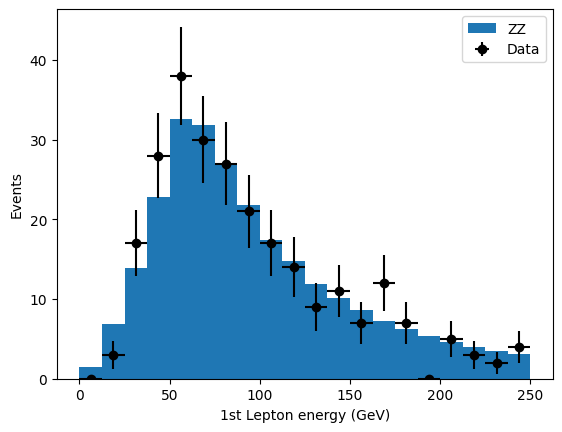

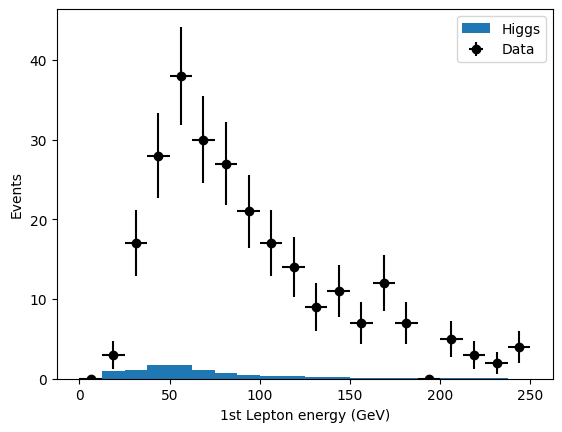

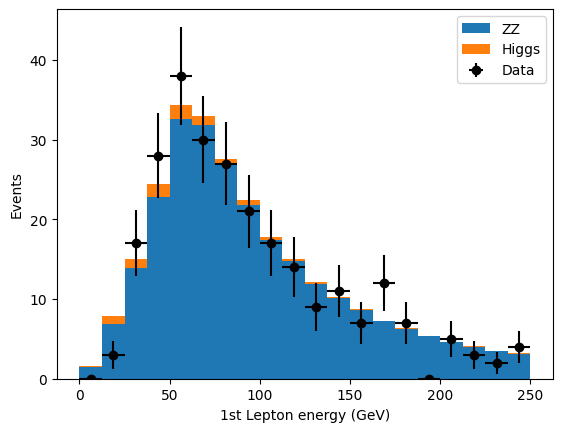

In [ ]:
#Energie du premier lepton:
print("Comparaison d'énergie du premier lepton")
plot(20, 0, 250, LepEnergyData, [LepEnergyZZ] ,[ WeightsZZ], [ 'ZZ' ], '1st Lepton energy (GeV)')
plot(20, 0, 250, LepEnergyData, [ LepEnergyHiggs] ,[  WeightsHiggs], [  'Higgs' ], '1st Lepton energy (GeV)')
plot(20, 0, 250, LepEnergyData, [LepEnergyZZ, LepEnergyHiggs] ,[ WeightsZZ, WeightsHiggs], [ 'ZZ', 'Higgs' ], '1st Lepton energy (GeV)')


Comparaison d'impulsion du premier lepton


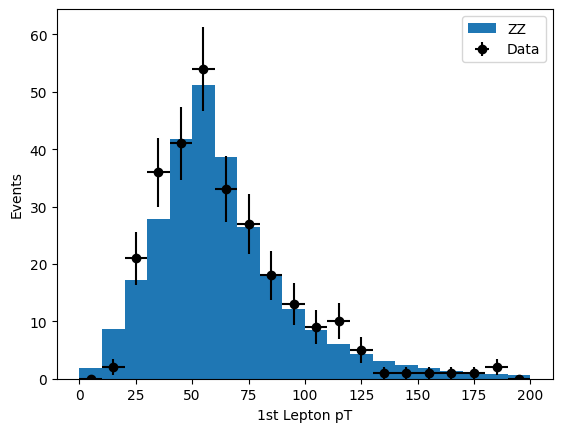

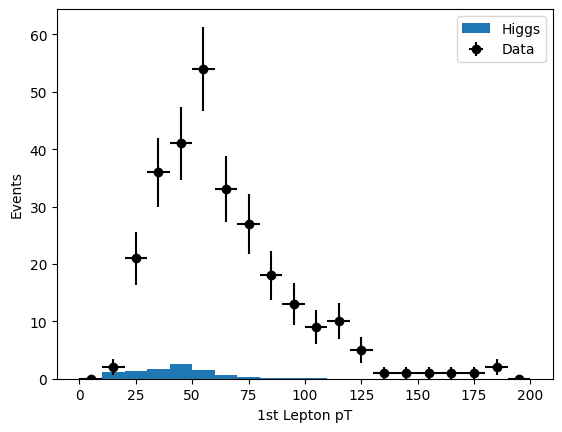

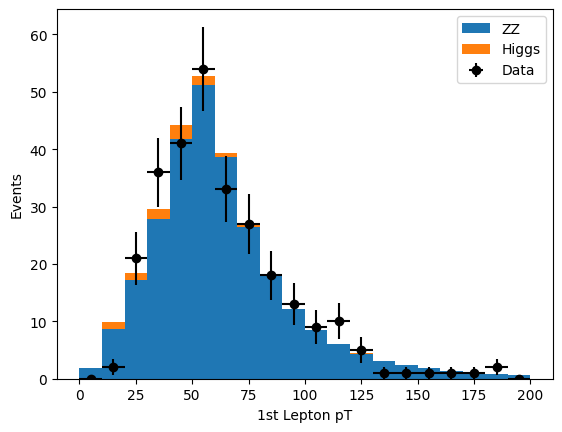

In [ ]:
#Impulsion du premier lepton:
print("Comparaison d'impulsion du premier lepton")
plot(20, 0, 200, LepPtData, [LepPtZZ], [ WeightsZZ] , [ 'ZZ' ], '1st Lepton pT')
plot(20, 0, 200, LepPtData, [ LepPtHiggs], [ WeightsHiggs] , [ 'Higgs' ], '1st Lepton pT')
plot(20, 0, 200, LepPtData, [LepPtZZ, LepPtHiggs], [ WeightsZZ, WeightsHiggs] , [ 'ZZ', 'Higgs' ], '1st Lepton pT')

Comparaison d'énergie des 4 leptons


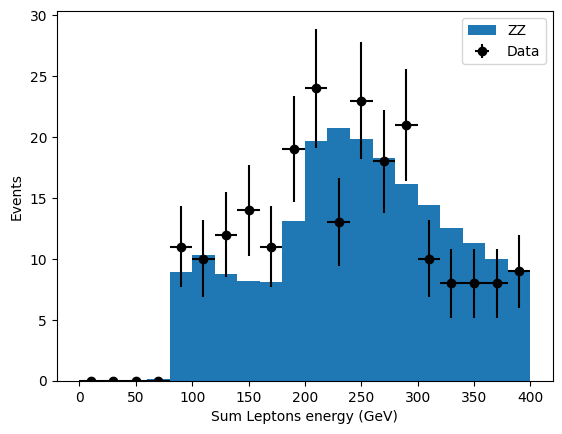

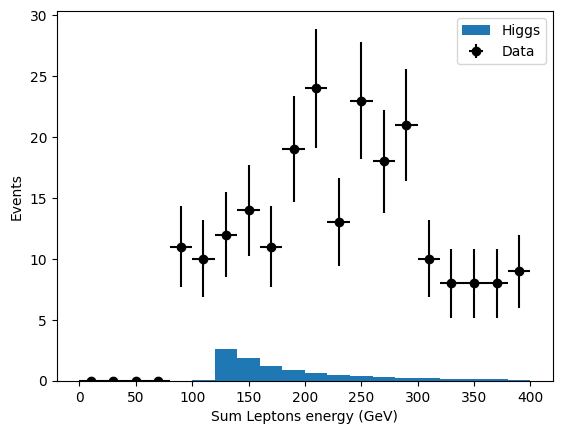

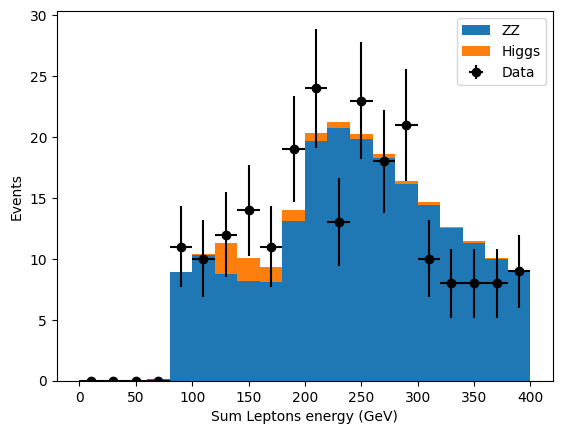

In [ ]:
#Energie des 4 leptons:
print("Comparaison d'énergie des 4 leptons")
plot(20, 0, 400, LepSummeEnergyData, [LepSummeEnergyZZ], [ WeightsZZ] , [ 'ZZ' ], 'Sum Leptons energy (GeV)')
plot(20, 0, 400, LepSummeEnergyData, [ LepSummeEnergyHiggs], [ WeightsHiggs] , [ 'Higgs' ], 'Sum Leptons energy (GeV)')
plot(20, 0, 400, LepSummeEnergyData, [LepSummeEnergyZZ, LepSummeEnergyHiggs], [ WeightsZZ, WeightsHiggs] , [ 'ZZ', 'Higgs' ], 'Sum Leptons energy (GeV)')

Comparaison d'énergie des 4 leptons


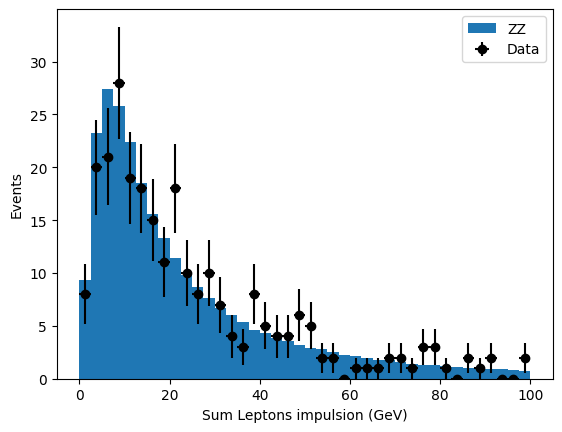

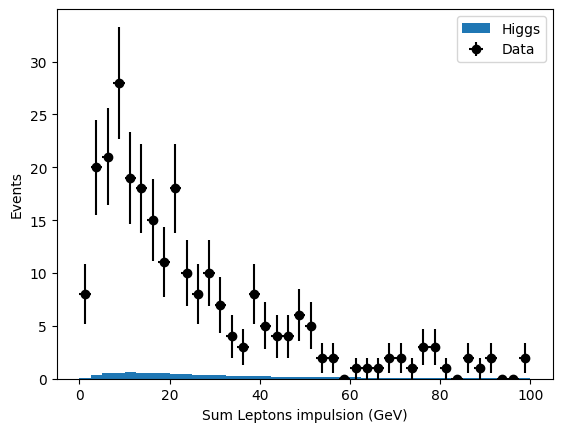

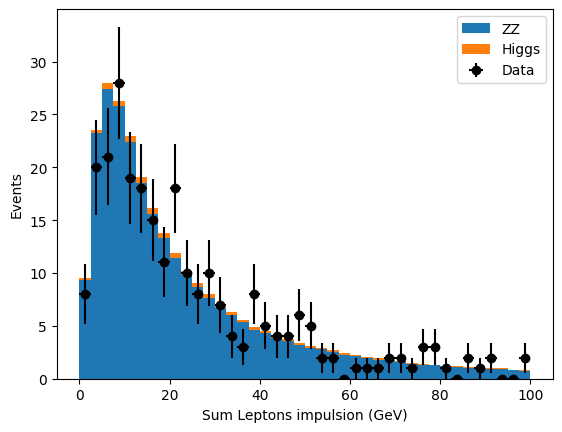

In [ ]:
#Impulsion des 4 leptons:
print("Comparaison d'énergie des 4 leptons")
plot(40, 0, 100, LepSumPtData, [LepSumPtZZ], [ WeightsZZ] , [ 'ZZ' ], 'Sum Leptons impulsion (GeV)')
plot(40, 0, 100, LepSumPtData, [ LepSumPtHiggs], [ WeightsHiggs] , [ 'Higgs' ], 'Sum Leptons impulsion (GeV)')
plot(40, 0, 100, LepSumPtData, [LepSumPtZZ, LepSumPtHiggs], [ WeightsZZ, WeightsHiggs] , [ 'ZZ', 'Higgs' ], 'Sum Leptons impulsion (GeV)')

Comparaison des masses des 4 leptons


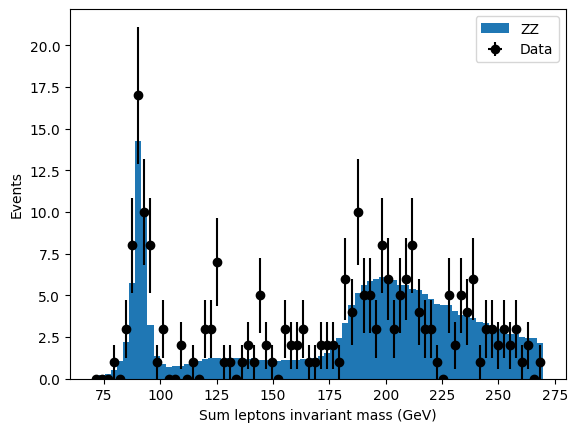

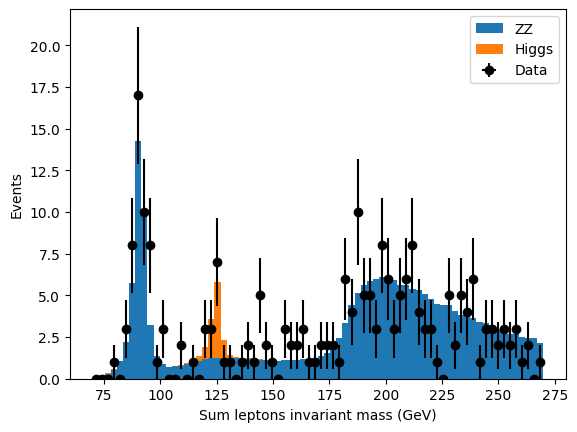

In [ ]:
#Masse des 4 leptons:
print("Comparaison des masses des 4 leptons")
plot(74, 70, 270, LepSumMassData, [LepSumMassZZ], [ WeightsZZ] , [ 'ZZ' ], 'Sum leptons invariant mass (GeV)')
#plot(74, 70, 270, LepSumMassData, [ LepSumMassHiggs], [ WeightsHiggs] , [ 'Higgs' ], 'Sum Leptons mass')
plot(74, 70, 270, LepSumMassData, [LepSumMassZZ, LepSumMassHiggs], [ WeightsZZ, WeightsHiggs] , [ 'ZZ', 'Higgs' ], 'Sum leptons invariant mass (GeV)')